# Assign 2: Scale heights for typical atmospheric soundings

Due (upload to canvas) Tuesday, Jan 30 before midnight

### Your name and student number:
<br>

### Variables checklist
The assessment of the following questions will depend on the definition of the following variables and functions. Make sure that you have defined each variable correctly. We will check that your functions return reasonable value ranges.

> <div class="alert alert-block alert-warning"> Provide a variable definition for each of the following variable names. Make sure your variables are spelled similarly to these listed or you will lose marks in the autograde. </div>

- [ ] `the_sounding`, Dataframe, type=pandas.DataFrame
      
- [ ] `Hbar`, scalar, dtype=float

- [ ] `Hrho`, scalar, dtype=float

- [ ] `calc_scale_height`, function
      
- [ ] `calc_dense_height`, function


For example, we will run your notebook and look for a `pandas` Dataframe with a name close to `the_sounding` and a `float` named `Hbar` with a reasonable value, etc. 

Note that in this and in future labs you might want to define additional variables for intermediate or preparatory steps in calculations. In these cases the choice of variable names are up to you, but good programming practice would choose names that are descriptive/meaningful. The content of these variables are not explicitly graded.

Your **figures** will be graded by hand using the `.pdf` we request in the next section.

### Submitting Your Assignment

> **To hand in the assignment**, download your final copy of your Jupyter Notebook as an `.ipynb` file. **In addition**, convert your notebook to `.pdf` with all of your plots rendered.
> 
> **Upload** the `.ipynb` and `.pdf` to Canvas under the link in Assignments for this week.

## Tasks

1. Get a unique sounding for your assigned region and season
2. Plot the dewpoint and temperature soundings using metpy
3. Write a function to calculate the pressure scale height
4. Write a funcion to calculate the  density scale height
5. Plot the  vertical pressure profile vs. the hydrostatic pressure profile for your pressure scale height

### 1. Getting a sounding

In the cell below, change the region, year, month and station to get a unique sounding for analysis (i.e. I'd like to spread out the soundings among regions and seasons).  The url for the Wyoming page is:  [https://weather.uwyo.edu/upperair/sounding.html](https://weather.uwyo.edu/upperair/sounding.html)

In [1]:
from a405.soundings.wyominglib import write_soundings
import numpy as np
sounding_dir = 'sounding_dir'
write = False
if write:
    region = ''
    year = ''
    month= ''
    start = '0100'
    stop = '0110'
    station = ''
    values=dict(region=region,year=year,month=month,start=start,stop=stop,station=station)
    write_soundings(values, sounding_dir)

## Plot your sounding here -- change the date to match your key

In [2]:
from a405.soundings.wyominglib import read_soundings
wyoming_dict = read_soundings(sounding_dir)
sounding_dict = wyoming_dict['sounding_dict']
the_sounding = sounding_dict[(2013, 7, 1, 0)]
press = the_sounding['pres'].to_numpy()  # hPa
dewpoint = the_sounding['dwpt'].to_numpy()  # degC
temp = the_sounding['temp'].to_numpy()  # degC
height = the_sounding['hght'].to_numpy()  # meters
tempK = temp + 273.15
pressPa = press*100.
height_km = height/1000.

In [3]:
# example
the_sounding

,Unnamed: 0,pres,hght,temp,dwpt,relh,mixr,drct,sknt,thta,thte,thtv
0,0,1014.0,17.0,18.4,14.8,80.0,10.493078,350.0,5.0,290.4,320.3,292.2
1,1,1012.0,34.0,17.0,12.3,74.0,8.911909,346.0,6.0,289.2,314.6,290.7
2,2,1001.0,125.0,15.6,12.0,79.0,8.832533,327.0,11.0,288.7,313.8,290.2
3,3,1000.0,133.0,15.6,12.0,79.0,8.841491,325.0,11.0,288.8,313.9,290.3
4,4,980.0,306.0,18.4,12.4,68.0,9.268841,320.0,10.0,293.2,320.1,294.9
...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,10.0,31750.0,-35.1,-73.1,1.0,0.194108,80.0,35.0,887.4,889.8,887.5
146,146,9.2,32309.0,-33.9,-72.4,1.0,0.233963,95.0,29.0,912.3,915.4,912.4
147,147,8.8,32614.0,-33.2,-72.0,1.0,0.259383,85.0,42.0,926.2,929.6,926.4
148,148,8.1,33223.0,-31.9,-71.2,1.0,0.316642,105.0,34.0,954.6,958.9,954.8


###  2. Plot the sounding

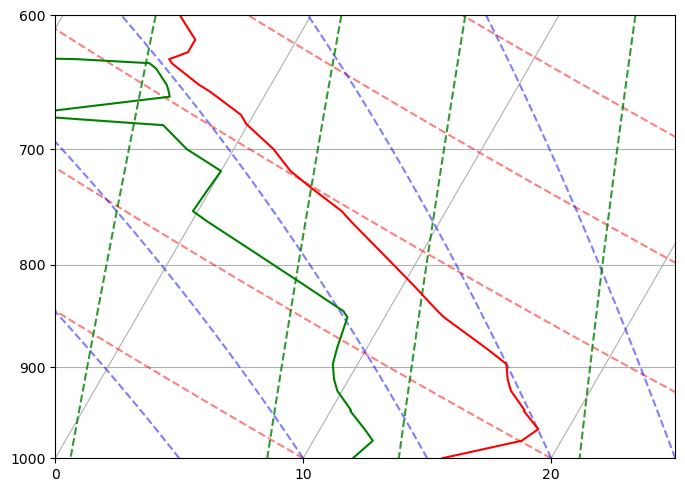

In [4]:
from metpy.plots import SkewT
from metpy.units import units
from matplotlib import pyplot as plt
import numpy as np
fig,ax =plt.subplots(1,1,figsize=(8,8));
fig.clf();
skew_plot = SkewT(fig)
skew_plot.ax.set_title("")  # add a title
skew_plot.ax.set(xlim=(0,25),ylim=(1000,600))
theta = np.array([0,10,20,30,40,50,60]) + 273.15
theta = theta*units("K")
skew_plot.plot_dry_adiabats(t0=theta)
skew_plot.plot_moist_adiabats()
skew_plot.plot_mixing_lines()
skew_plot.plot(press, temp, 'r')
skew_plot.plot(press, dewpoint, 'g');

In [5]:
# your sounding plot here

### 3. Calculate the pressure scale height

Here is equation 14 of the [hydrostatic balance notes](https://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/hydro.pdf)

$$\frac{ 1}{\overline{H_p}} =  \overline{ \left ( \frac{1 }{H} \right )} = \frac{\int_{0 }^{z}\!\frac{1}{H} dz^\prime  }{z-0} $$

where

$$H=R_d T/g$$

a. Turn this into a python function called `calc_scale_height` that takes sounding vectors of temperature, pressure and height and returns
   the pressure scale height in meters

b.  Use this to find the pressure scale height in meters as a scalar variable named `Hbar`

In [6]:
#
#  in this cell define a function called
#
#  calc_scale_height(T,p,z)
#  which takes vertical profiles of temperature, pressure and height and calculates the
#  pressure scale height in meters
#

g=9.8  # don't worry about g(z) for this exercise
Rd=287.  # kg/m^3

def calc_scale_height(T,p,z):
    """
    Calculate the pressure scale height H_p
    
    Parameters
    ----------
    
    T: vector (float)
      temperature (K)
      
    p: vector (float) of len(T)
      pressure (pa)
      
    z: vector (float) of len(T
      height (m)
      
    Returns
    -------
    
    Hbar: vector (float) of len(T)
      pressure scale height (m)
    
    """
    # your code here
    return Hbar

### 3. Answer

In [7]:
# evaluate calc_scale_height with your inputs

### 4. Calculate the density scale height

Similarly, equation (23) of the [hydrostatic balance notes](https://clouds.eos.ubc.ca/~phil/courses/atsc500/docs/hydro.pdf)
is:

$$\frac{d\rho }{\rho} = - \left ( \frac{1 }{H} + 
                   \frac{1 }{T} \frac{dT }{dz} \right ) dz \equiv - \frac{dz }{H_\rho} $$
                   
Which leads to 

$$\frac{ 1}{\overline{H_\rho}}  = \frac{\int_{0 }^{z}\!\left [ \frac{1}{H} + \frac{1 }{T} \frac{dT }{dz} \right ] dz^\prime  }{z-0} $$

and the following python function:

In [8]:
#
#  in this cell define a function called
#
#  calc_dense_height(T,p,z)
#  which takes vertical profiles of temperature, pressure and height and calculates the
#  density scale height in meters
#

def calc_dense_height(T,p,z):
    """
    Calculate the density scale height H_rho
    
    Parameters
    ----------
    
    T: vector (float)
      temperature (K)
      
    p: vector (float) of len(T)
      pressure (pa)
      
    z: vector (float) of len(T
      height (m)
      
    Returns
    -------
    
    Hbar: vector (float) of len(T)
      density scale height (m)
    """
    # your code here
    return Hbar

### 4. Answer

In [9]:
# evaluate calc_dense_height with your inputs

### 5. How does the hydrostatic profile compare to the observed pressure sounding?

Now check the hydrostatic approximation by plotting the pressure column against

$$p(z) = p_0 \exp \left (-z/\overline{H}_p \right )$$

vs. the actual sounding p(T):

### 5. Answer

In [10]:
#
#  In this cell make a plot with two lines, 
#
#  line 1: press (hPa) vs. height_km (vertical axis)
#  line 2: press p(z) from equation 5 (hPa) vs. height_km
#
#  include a legend that clear identifies the two lines
#  set the y axis limits from 0 to 10 km
#
# your code here